# Marketing Algorithm Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
bnk_mkt_data = pd.read_csv('bank-additional-full.csv', sep= ';')

In [3]:
bnk_mkt_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
bnk_mkt_data.shape

(41188, 21)

In [5]:
bnk_mkt_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
bnk_mkt_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bnk_mkt_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
bnk_mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#filtering numerical features by data types
num_features = bnk_mkt_data.select_dtypes(include = ['int64', 'float64'])
num_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [10]:
#filtering categorical features by data types
cat_features = bnk_mkt_data.select_dtypes(include=['object']).columns
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

Text(0.5, 1.0, 'DISTRIBUTION FOR NUMERICAL FEATURES')

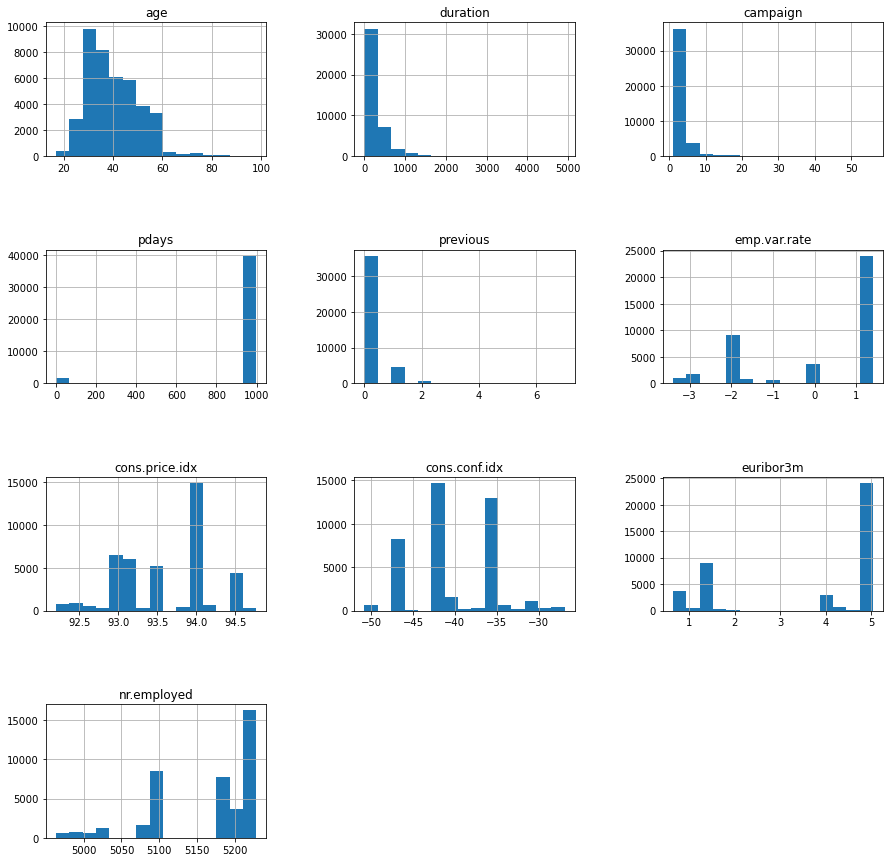

In [11]:
#Check the distribution of the columns with null values
num_features.hist(figsize=(15, 15), bins=15)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('DISTRIBUTION FOR NUMERICAL FEATURES')

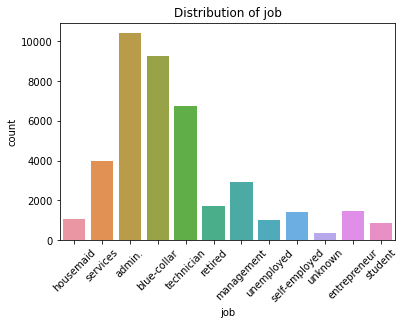

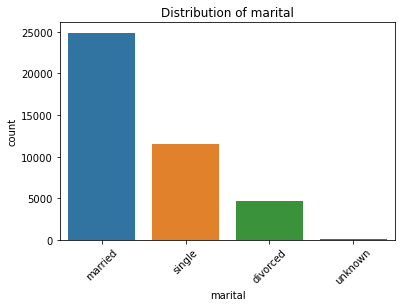

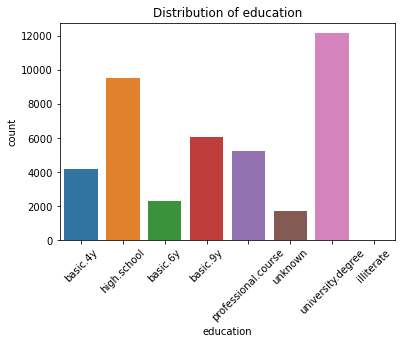

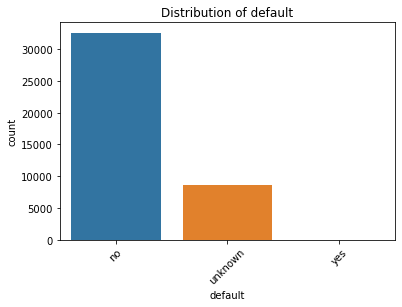

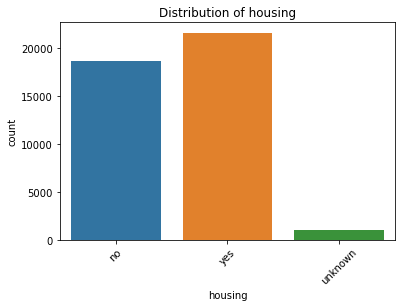

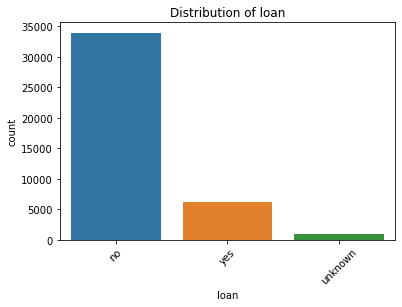

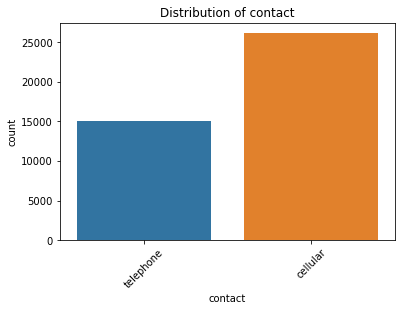

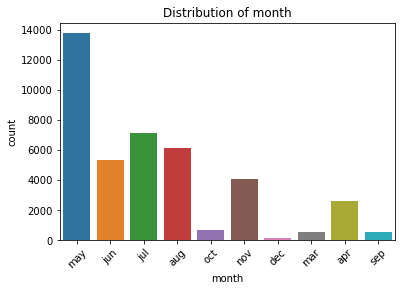

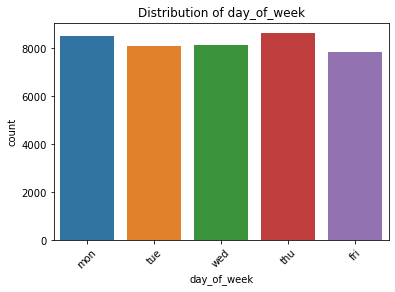

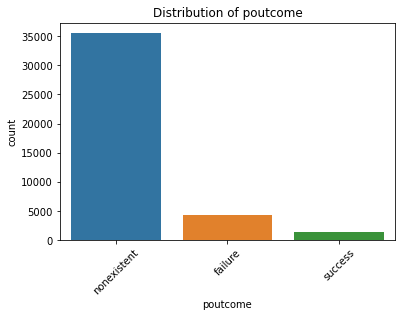

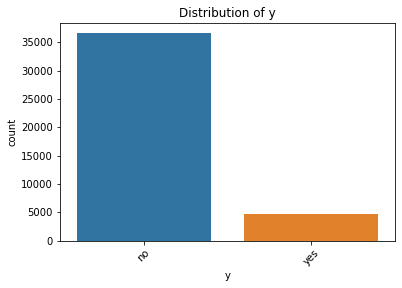

In [12]:
#Plot the Distribution of categorical features

for cat in cat_features:
    sns.countplot(x= cat, data = bnk_mkt_data)
    plt.title(f'Distribution of {cat}')
    plt.xticks(rotation= 45)
    plt.show()

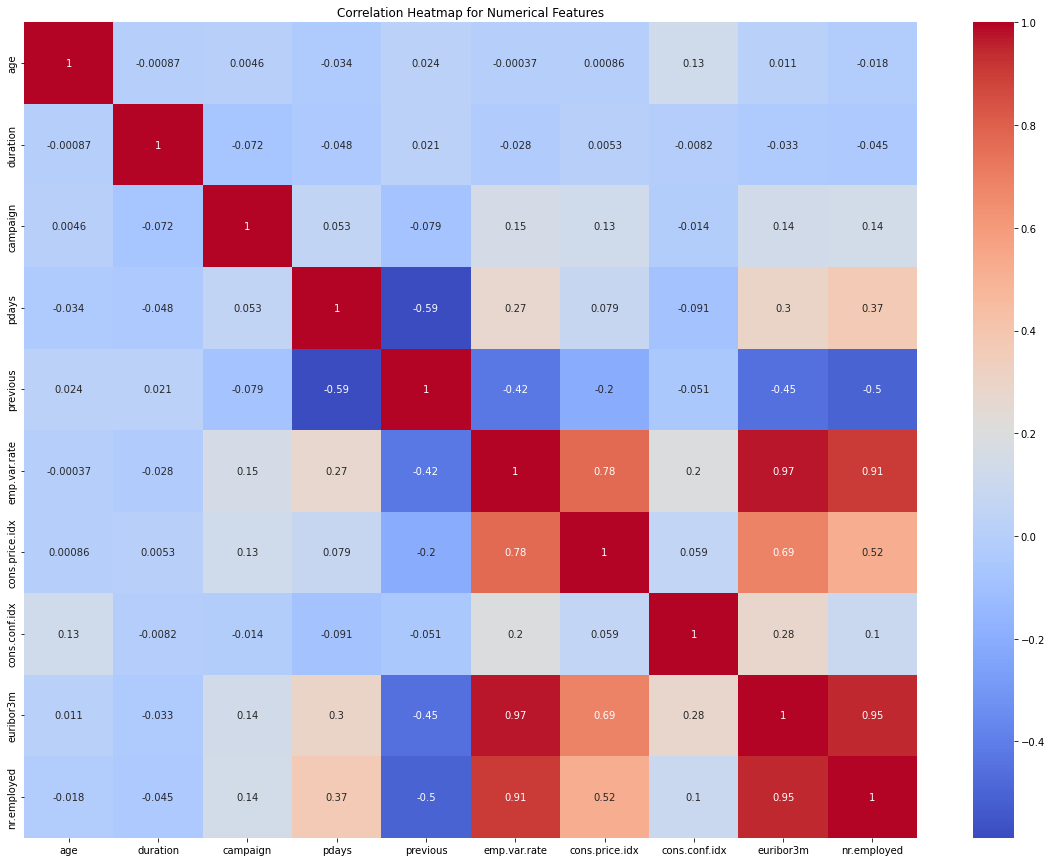

In [15]:
num_features = bnk_mkt_data.select_dtypes(include = ['int64', 'float64']).columns
# Correlation heatmap for numerical features
plt.figure(figsize=(20,10))
sns.heatmap(bnk_mkt_data[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [16]:
cat_f= bnk_mkt_data[cat_features]

In [17]:
for cat in cat_f:
    x= cat_f[cat].value_counts()
    print(x)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

In [18]:
bnk_mkt_data['job']=bnk_mkt_data['job'].replace("unknown", np.nan, regex= True)
bnk_mkt_data['marital']=bnk_mkt_data['marital'].replace("unknown", np.nan, regex= True)
bnk_mkt_data['education']=bnk_mkt_data['education'].replace("unknown", np.nan, regex= True)
bnk_mkt_data['housing']=bnk_mkt_data['housing'].replace("unknown", np.nan, regex= True)
bnk_mkt_data['default']=bnk_mkt_data['default'].replace("unknown", np.nan, regex= True)
bnk_mkt_data['loan']=bnk_mkt_data['loan'].replace("unknown", np.nan, regex= True)

In [19]:
bnk_mkt_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
#creating a variable to store the percentages of the null values in the data
missing_percentages = bnk_mkt_data.isnull().sum().sort_values(ascending = False) / len(bnk_mkt_data)

#creating a variable to store the percentages of the null values in the strike data that is not equal
#to zero
missingvalues_notequal_tozero = missing_percentages[missing_percentages != 0]

In [21]:
missingvalues_notequal_tozero

default      0.208726
education    0.042027
housing      0.024036
loan         0.024036
job          0.008012
marital      0.001942
dtype: float64

<AxesSubplot:>

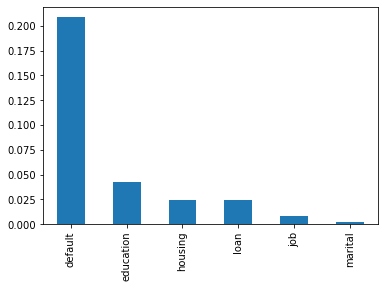

In [22]:
missingvalues_notequal_tozero.plot(kind='bar')

since the missing values is less than 60%, we fix using simple imputer techniques 

In [23]:
#using simple imputer to fix missing values, but first split data into test and training set
#split datasets into X_train and X_test

X_train,X_test = \
train_test_split(bnk_mkt_data, test_size=0.3, random_state = 0)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    bnk_mkt_data.drop('y', axis=1), bnk_mkt_data['y'], test_size=0.3, 
    random_state=0)

In [25]:
y_train.shape

(28831,)

In [26]:
y_test.shape

(12357,)

In [27]:
#Create a frequent category imputer with SimpleImputer() from scikit-learn:
imputer = SimpleImputer(strategy='most_frequent')

In [28]:
df1 = ['job','marital','education','default','housing','loan']

In [29]:
X_train[df1]

,job,marital,education,default,housing,loan
31880,management,married,university.degree,NaN,no,yes
38177,management,divorced,university.degree,NaN,yes,no
2459,blue-collar,married,basic.9y,NaN,no,no
756,services,married,university.degree,no,yes,no
11275,blue-collar,single,basic.9y,no,no,no
...,...,...,...,...,...,...
20757,admin.,divorced,university.degree,no,no,no
32103,management,divorced,university.degree,no,no,no
30403,admin.,single,professional.course,no,no,no
21243,housemaid,single,professional.course,no,yes,yes


In [30]:
#Fit the imputer to the train set so that it learns the most frequent values:
imputer.fit(X_train[df1])

SimpleImputer(strategy='most_frequent')

In [31]:
#Inspect the most frequent values learned by the imputer:
imputer.statistics_

array(['admin.', 'married', 'university.degree', 'no', 'yes', 'no'],
      dtype=object)

In [32]:
#Replace missing values with frequent categories:
X_train[df1] = imputer.transform(X_train[df1])
X_test[df1] = imputer.transform(X_test[df1])

In [33]:
X_train[df1].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

In [34]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
31880,37,management,married,university.degree,no,no,yes,cellular,may,thu,195,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
38177,54,management,divorced,university.degree,no,yes,no,cellular,oct,thu,214,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5
2459,49,blue-collar,married,basic.9y,no,no,no,telephone,may,tue,813,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
756,30,services,married,university.degree,no,yes,no,telephone,may,wed,51,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
11275,23,blue-collar,single,basic.9y,no,no,no,telephone,jun,thu,359,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,52,admin.,divorced,university.degree,no,no,no,cellular,aug,wed,559,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
32103,56,management,divorced,university.degree,no,no,no,cellular,may,fri,166,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
30403,29,admin.,single,professional.course,no,no,no,cellular,apr,thu,427,3,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1
21243,35,housemaid,single,professional.course,no,yes,yes,cellular,aug,mon,111,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


In [35]:
y_train.replace({'yes': 1, 'no':0}, inplace= True)
y_test.replace({'yes': 1, 'no':0}, inplace= True)

In [36]:
y_train

31880    0
38177    0
2459     0
756      0
11275    0
        ..
20757    0
32103    0
30403    1
21243    0
2732     0
Name: y, Length: 28831, dtype: int64

In [37]:
X_train.shape

(28831, 20)

In [38]:
X_test.shape

(12357, 20)

In [39]:
#select categorical feature from the X_train

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train)
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [40]:
X_train.nunique()

age                 77
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1420
campaign            41
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          311
nr.employed         11
dtype: int64

In [41]:
#Using One-Hot encoder to encode selescted categorical features 

In [42]:
cat_edu= [cat for cat in X_train['marital'].value_counts().sort_values(
        ascending=False).index]

In [43]:
cat_edu_test= [cat for cat in X_test['marital'].value_counts().sort_values(
        ascending=False).index]

In [44]:
#adding binary variable per top category in the train and test sets:
for cat in cat_edu:
    X_train['marital' + '_' + cat] = np.where(X_train['marital'] == cat, 1, 0)
    
for cat in cat_edu_test:
    X_test['marital' + '_' + cat] = np.where(X_test['marital'] == cat, 1, 0)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#Using Label encoder to encode all categorical feature

encoder = LabelEncoder()

In [47]:
#encoder to transform categorical values into corresponsding numerical labels
"""taking all values with categorical values and one label to each of the unique values"""

df_categ = ['job','education','default','housing','loan','contact', 'month', 'day_of_week', 'poutcome']

X_train[df_categ] = X_train[df_categ].apply(encoder.fit_transform)
X_test[df_categ] = X_test[df_categ].apply(encoder.fit_transform)

In [48]:
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,marital_divorced
15500,39,1,married,2,0,1,0,0,3,0,...,0,1,1.4,93.918,-42.7,4.957,5228.1,1,0,0
29034,55,1,married,0,0,1,0,0,0,0,...,0,1,-1.8,93.075,-47.1,1.405,5099.1,1,0,0
11199,39,1,married,2,0,0,0,1,4,2,...,0,1,1.4,94.465,-41.8,4.961,5228.1,1,0,0
22247,56,6,married,2,0,1,0,0,1,2,...,0,1,1.4,93.444,-36.1,4.963,5228.1,1,0,0
27180,49,1,married,2,0,1,0,0,7,0,...,0,1,-0.1,93.200,-42.0,4.021,5195.8,1,0,0


In [49]:
X_train.drop(['marital'], axis=1, inplace= True)

In [50]:
X_test.drop(['marital'], axis=1, inplace= True)

In [51]:
X_train.nunique()

age                   77
job                   11
education              7
default                2
housing                2
loan                   2
contact                2
month                 10
day_of_week            5
duration            1420
campaign              41
pdays                 26
previous               8
poutcome               3
emp.var.rate          10
cons.price.idx        26
cons.conf.idx         26
euribor3m            311
nr.employed           11
marital_married        2
marital_single         2
marital_divorced       2
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE SCALING</h2>
</div>

In [52]:
#import the scikit-learn transformers:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [53]:
"""set up the StandardScaler() from scikit-learn so that it learns and subtracts the mean but does not divide the result
by the standard deviation:"""

scaler_mean = StandardScaler(with_mean=True, with_std=False)

In [54]:
"""Next, is to set up the RobustScaler() from scikit-learn so that it does not remove the median from the values but divides them by the value range, that is, the difference between the maximum and minimum values:
Specify (0, 100) in the quantile_range argument of RobustScaler() to divide by the difference between the minimum and maximum values,"""

scaler_minmax = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(0, 100))

In [55]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

RobustScaler(quantile_range=(0, 100), with_centering=False)

The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). RobustScaler does not limit the scaled range by a predetermined interval, like in MinMaxScaler.

In [56]:
#fit the scalers to the train set so that they learn and store the mean, maximum, and minimum values:

scaler_mean.transform(X_train)
scaler_minmax.transform(X_train) 

array([[0.45679012, 0.4       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.4       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60493827, 0.1       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35802469, 0.        , 0.83333333, ..., 0.        , 1.        ,
        0.        ],
       [0.43209877, 0.3       , 0.83333333, ..., 0.        , 1.        ,
        0.        ],
       [0.64197531, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [57]:
scaler_mean.transform(X_test)
scaler_minmax.transform(X_test)

array([[0.48148148, 0.1       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.67901235, 0.1       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.48148148, 0.1       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.5308642 , 0.7       , 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.48148148, 0.3       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.56790123, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ]])

Fitting the entire dataset to the standard scaler object causes the model to learn about test set. However, models are not supposed to learn anything about test set. It destroys the purpose of train-test split. In general, this issue is called data leakage. This give rise to the reason behind X_test is not being fitted but only transformed.

In [58]:
X_train = pd.DataFrame(scaler_minmax.transform(X_train), columns= ['age','job','education','default','housing','loan','contact', 'month', 'day_of_week', 
                                                                   'duration', 'campaign', 'pdays', 'previous','poutcome', 'emp.var.rate','cons.price.idx', 
                                                                   'cons.conf.idx', 'euribor3m', 'nr.employed','marital_married','marital_single','marital_divorced'])

X_test = pd.DataFrame(scaler_minmax.transform(X_test), columns= ['age','job','education','default','housing','loan','contact', 'month', 'day_of_week', 
                                                                   'duration', 'campaign', 'pdays', 'previous','poutcome', 'emp.var.rate','cons.price.idx', 
                                                                   'cons.conf.idx', 'euribor3m', 'nr.employed','marital_married','marital_single','marital_divorced'])

In [59]:
X_train.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,marital_divorced
0,0.456790,0.4,1.000000,0.0,0.0,1.0,0.0,0.666667,0.50,0.046440,...,0.0,0.5,-0.375000,36.201481,-1.933054,0.300839,19.278261,1.0,0.0,0.0
1,0.666667,0.4,1.000000,0.0,1.0,0.0,0.0,0.888889,0.50,0.050965,...,0.0,0.5,-0.708333,36.021434,-1.125523,0.170936,18.969754,0.0,0.0,1.0
2,0.604938,0.1,0.333333,0.0,0.0,0.0,1.0,0.666667,0.75,0.193618,...,0.0,0.5,0.229167,36.630553,-1.523013,1.100884,19.625709,1.0,0.0,0.0
3,0.370370,0.7,1.000000,0.0,1.0,0.0,1.0,0.666667,1.00,0.012146,...,0.0,0.5,0.229167,36.630553,-1.523013,1.100884,19.625709,1.0,0.0,0.0
4,0.283951,0.1,0.333333,0.0,0.0,0.0,1.0,0.444444,0.50,0.085497,...,0.0,0.5,0.291667,36.814108,-1.748954,1.124688,19.765974,0.0,1.0,0.0


In [60]:
y_train.unique()

array([0, 1], dtype=int64)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE SELECTION</h2>
</div>

In [61]:
#Concatenating the data in df variable
#To carry out feature selection, the train_test_split will be joined together as a single dataset

bnk_mkt_new =pd.concat([X_train, X_test],sort=False,ignore_index=True)
bnk_mkt_new

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_married,marital_single,marital_divorced
0,0.456790,0.4,1.000000,0.0,0.0,1.0,0.0,0.666667,0.50,0.046440,...,0.0,0.5,-0.375000,36.201481,-1.933054,0.300839,19.278261,1.0,0.0,0.0
1,0.666667,0.4,1.000000,0.0,1.0,0.0,0.0,0.888889,0.50,0.050965,...,0.0,0.5,-0.708333,36.021434,-1.125523,0.170936,18.969754,0.0,0.0,1.0
2,0.604938,0.1,0.333333,0.0,0.0,0.0,1.0,0.666667,0.75,0.193618,...,0.0,0.5,0.229167,36.630553,-1.523013,1.100884,19.625709,1.0,0.0,0.0
3,0.370370,0.7,1.000000,0.0,1.0,0.0,1.0,0.666667,1.00,0.012146,...,0.0,0.5,0.229167,36.630553,-1.523013,1.100884,19.625709,1.0,0.0,0.0
4,0.283951,0.1,0.333333,0.0,0.0,0.0,1.0,0.444444,0.50,0.085497,...,0.0,0.5,0.291667,36.814108,-1.748954,1.124688,19.765974,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.432099,0.9,0.833333,0.0,0.0,0.0,0.0,0.111111,0.50,0.009050,...,0.0,0.5,0.291667,36.416212,-1.510460,1.125368,19.765974,1.0,0.0,0.0
41184,0.481481,0.9,0.833333,0.0,0.0,0.0,0.0,0.333333,0.25,0.146940,...,0.0,0.5,0.291667,36.600935,-1.786611,1.124462,19.765974,0.0,1.0,0.0
41185,0.530864,0.7,0.166667,0.0,1.0,0.0,0.0,0.666667,0.00,0.016194,...,0.0,0.5,-0.375000,36.201481,-1.933054,0.283382,19.278261,1.0,0.0,0.0
41186,0.481481,0.3,1.000000,0.0,0.0,0.0,1.0,0.666667,1.00,0.041438,...,0.0,0.5,0.229167,36.630553,-1.523013,1.101338,19.625709,1.0,0.0,0.0


In [62]:
bnk_mkt_y =pd.concat([y_train, y_test],sort=False,ignore_index=True)
bnk_mkt_y

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    1
41185    0
41186    0
41187    1
Name: y, Length: 41188, dtype: int64

Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Due to this reason and to avoid data leakage, duration, observation #11 will be dropped 

In [63]:
bnk_mkt_new.drop(['duration'], inplace= True, axis=1)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>FEATURE IMPORTANCE</h2>
</div>

In [64]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from mlxtend.feature_selection import SequentialFeatureSelector #Sequential Feature Selection
from sklearn.ensemble import RandomForestClassifier #Random Forest for Feature Selection

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [66]:
#Using decision tree classifier feature importance
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(bnk_mkt_new, bnk_mkt_y)

DecisionTreeClassifier(max_depth=5)

In [67]:
predictors = bnk_mkt_new.columns

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

marital_divorced   0.000
job                0.000
default            0.000
housing            0.000
loan               0.000
marital_married    0.000
emp.var.rate       0.000
previous           0.000
marital_single     0.000
education          0.001
campaign           0.005
age                0.007
cons.price.idx     0.012
contact            0.014
poutcome           0.015
day_of_week        0.029
month              0.042
euribor3m          0.043
cons.conf.idx      0.060
pdays              0.126
nr.employed        0.646
dtype: float64


<AxesSubplot:title={'center':'Top Important 15 Features that can Help Predict Marketing Strategy Outcome'}>

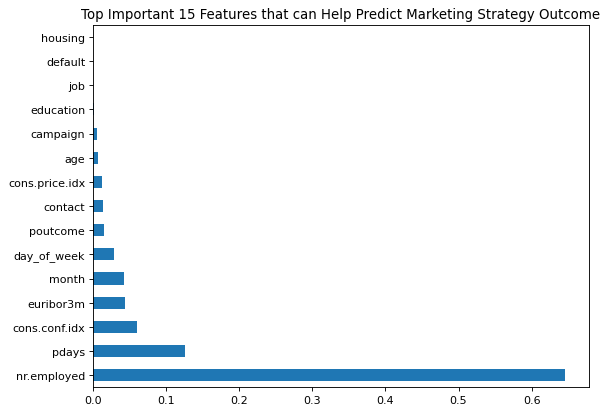

In [68]:
#Get the Top 10 features
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important 15 Features that can Help Predict Marketing Strategy Outcome")

feat_importances = pd.Series(decision_tree.feature_importances_, index= bnk_mkt_new.columns)

feat_importances.nlargest(15).plot(kind='barh')

##### Considering Random Forest Classifier 


In [69]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_estimators = 15),
                                             k_features = 15,
                                             forward = False, #forward selection
                                             scoring = "accuracy", # to score the classifier performanace
                                             cv = 4) #using training data for training and testing at same time

#CV means cross validation which uses available training data to inform your model,
#while also using that data to make predictions on how well the model will be able to predict outcomes on new data.

In [70]:
features = feature_selector.fit(np.array(bnk_mkt_new), bnk_mkt_y)

In [71]:
#Get the relevant variable
backward_feature_names = list(bnk_mkt_new.columns[list(features.k_feature_idx_)])

backward_feature_names

['age',
 'job',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'euribor3m',
 'marital_single',
 'marital_divorced']

In [72]:
#View the selected features
backward_features = bnk_mkt_new[backward_feature_names]

backward_features.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,euribor3m,marital_single,marital_divorced
0,0.457,0.400,1.000,0.000,0.000,1.000,0.000,0.667,0.500,0.018,1.000,0.000,0.301,0.000,0.000
1,0.667,0.400,1.000,0.000,1.000,0.000,0.000,0.889,0.500,0.018,1.000,0.000,0.171,0.000,1.000
2,0.605,0.100,0.333,0.000,0.000,0.000,1.000,0.667,0.750,0.036,1.000,0.000,1.101,0.000,0.000
3,0.370,0.700,1.000,0.000,1.000,0.000,1.000,0.667,1.000,0.055,1.000,0.000,1.101,0.000,0.000
4,0.284,0.100,0.333,0.000,0.000,0.000,1.000,0.444,0.500,0.018,1.000,0.000,1.125,1.000,0.000


<AxesSubplot:>

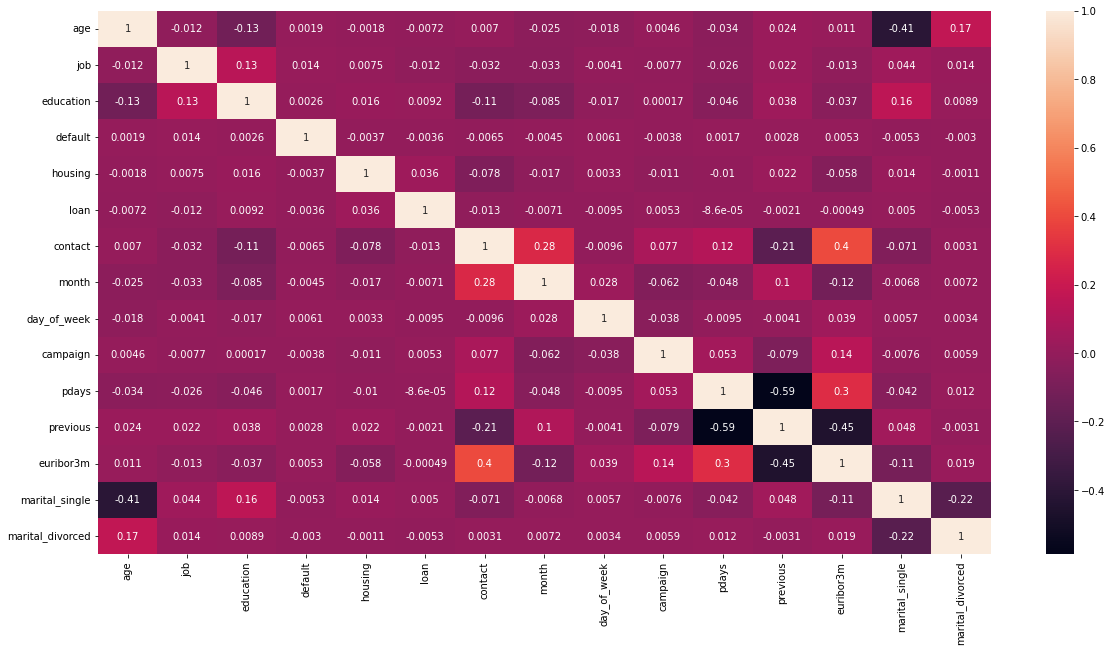

In [73]:
#finding correlation between target variable and other features
plt.figure(figsize=(20,10))
sns.heatmap(backward_features.corr(),annot=True)

##### Considering Mutual Information Classifier 

In [74]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif( bnk_mkt_new, bnk_mkt_y)
mutual_info

array([0.01458603, 0.0110755 , 0.00557121, 0.00078458, 0.00120163,
       0.00113163, 0.01255666, 0.02726661, 0.        , 0.00389364,
       0.03748   , 0.02007235, 0.03225442, 0.05723648, 0.06901586,
       0.06984263, 0.07310456, 0.06589979, 0.00352817, 0.00149275,
       0.00110122])

In [75]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = bnk_mkt_new.columns
mutual_info.sort_values(ascending=False)

euribor3m          0.073
cons.conf.idx      0.070
cons.price.idx     0.069
nr.employed        0.066
emp.var.rate       0.057
pdays              0.037
poutcome           0.032
month              0.027
previous           0.020
age                0.015
contact            0.013
job                0.011
education          0.006
campaign           0.004
marital_married    0.004
marital_single     0.001
housing            0.001
loan               0.001
marital_divorced   0.001
default            0.001
day_of_week        0.000
dtype: float64

<AxesSubplot:>

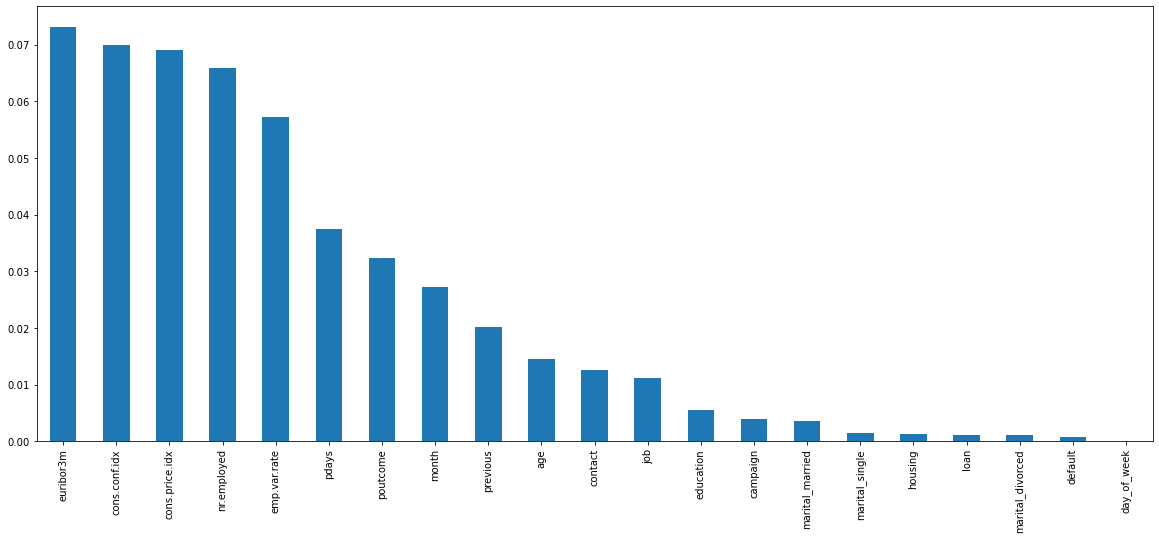

In [76]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

##### Considering Mutual Information Classifier using KBest

In [89]:
#To select the top best 15 feature, using kbest

from sklearn.feature_selection import SelectKBest
sel_15_cols = SelectKBest(mutual_info_classif, k=15)
sel_15_cols.fit(bnk_mkt_new, bnk_mkt_y)
bnk_mkt_new.columns[sel_15_cols.get_support()]

Index(['age', 'job', 'housing', 'contact', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'marital_married'],
      dtype='object')

The top ten features selected does not include the nr.employed, which is one of the essential features for our predictions, as a result the number of features to be selected is increased to fifteen features. So these are the top fifteen features that give the most important information about the target variable.

Also, considering all the Feature Selection presented here, it is noteworthy that Mutual Information Classifier using KBest techniques selected substantial features than other feature selection techniques. Therefore, this techniques output is fed into the Machine Learning models as given below.

In [90]:
#Subset out the identified importance 15 features
Best_bnk_mkt_new_features= bnk_mkt_new[['age', 'job', 'education', 'housing', 'contact', 'month', 'campaign',
                                        'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                                        'cons.conf.idx', 'euribor3m', 'nr.employed']]

<AxesSubplot:ylabel='Frequency'>

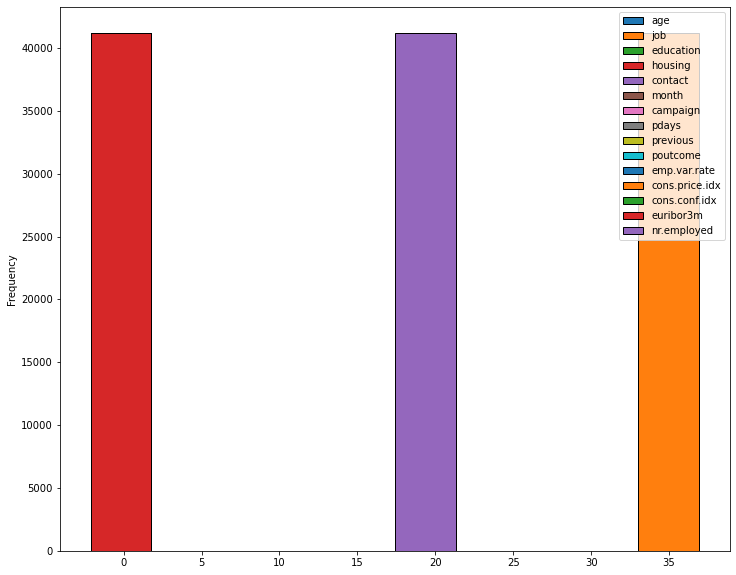

In [91]:
Best_bnk_mkt_new_features.plot.hist(figsize=(12, 10), edgecolor="black")
#Best_marketing_features.plot.bar(figsize=(20, 8))

#### Splitting of the bnk_mkt_data_new into train_test_split

In [92]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
import pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from collections import OrderedDict

In [93]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(Best_bnk_mkt_new_features, bnk_mkt_y, 
                                                                    test_size=0.3, random_state=0)

In [94]:
X_train.shape

(28831, 15)

In [95]:
X_test.shape

(12357, 15)

In [96]:
y_train.shape

(28831,)

In [97]:
y_test.shape

(12357,)

### Balancing of the Target Variable by Upsampling of Majority and Minority Class

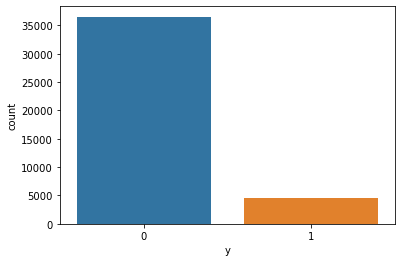

In [98]:
# We show the composition of the target variable for the training data. The target variable is not balance.
train_labels=bnk_mkt_y.to_frame()
sns.countplot(x='y', data=train_labels)
plt.show()

In [99]:
bnk_mkt_y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [100]:
#Concatenate y_train and X_train to apply balancing.
bnk_mkt_new_bal = pd.concat([bnk_mkt_y, Best_bnk_mkt_new_features], axis=1)
bnk_mkt_new_bal.shape

(41188, 16)

In [101]:
#import resample() library from sklearn

from sklearn.utils import resample

<AxesSubplot:xlabel='y', ylabel='count'>

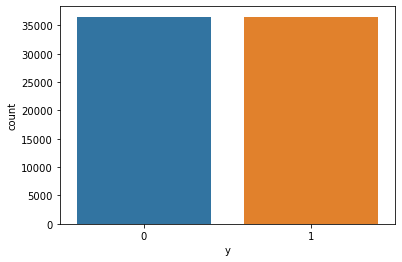

In [102]:
df_majority = bnk_mkt_new_bal[bnk_mkt_new_bal.y==0]
df_minority = bnk_mkt_new_bal[bnk_mkt_new_bal.y==1]

# Upsample minority class == 1
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=36548,  # to match majority class
                                 random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Plot the new balanced target of training data
sns.countplot(x= 'y', data=df_upsampled) 

<AxesSubplot:>

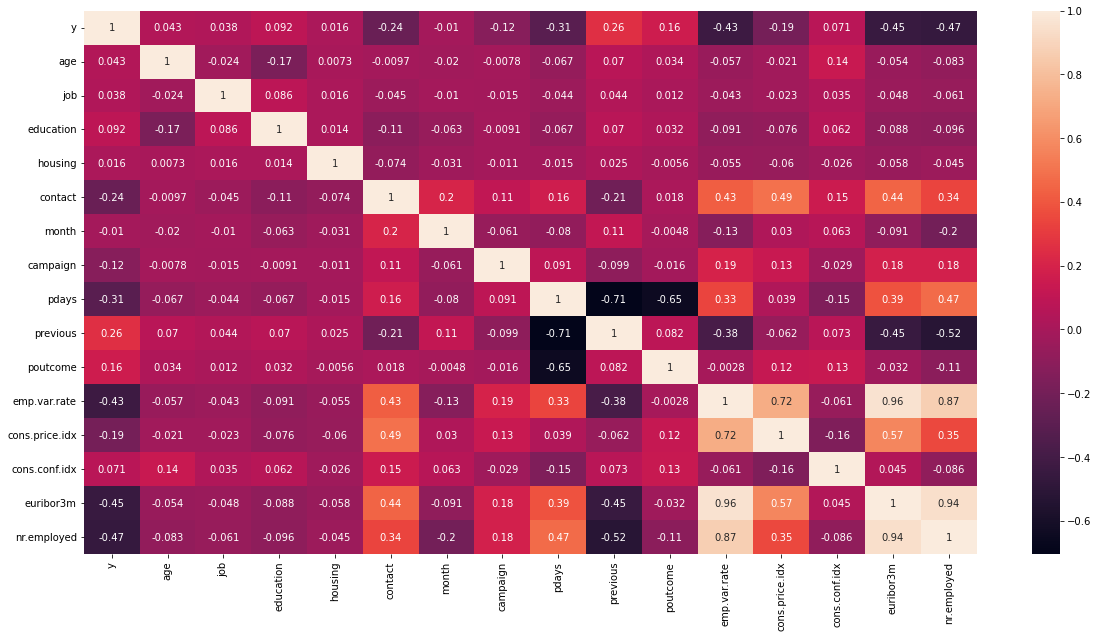

In [103]:
#finding correlation between target variable and other features
plt.figure(figsize=(20,10))
sns.heatmap(df_upsampled.corr(),annot=True)

**we drop 'emp.var.rate','euribor3m', 'cons.price.idx' due to the highly correlation of the features which can lead
to data leakage**

In [104]:
#Final Balanced Training Label (Target)
y_train_balanced = df_upsampled["y"] 
y_train_balanced

0        0
1        0
2        0
3        0
4        0
        ..
22404    1
24750    1
2793     1
21728    1
37132    1
Name: y, Length: 73096, dtype: int64

In [105]:
# Final training features
X_train_new = df_upsampled.drop(["y"], axis = 1)
X_train_new

,age,job,education,housing,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.457,0.400,1.000,0.000,0.000,0.667,0.018,1.000,0.000,0.500,-0.375,36.201,-1.933,0.301,19.278
1,0.667,0.400,1.000,1.000,0.000,0.889,0.018,1.000,0.000,0.500,-0.708,36.021,-1.126,0.171,18.970
2,0.605,0.100,0.333,0.000,1.000,0.667,0.036,1.000,0.000,0.500,0.229,36.631,-1.523,1.101,19.626
3,0.370,0.700,1.000,1.000,1.000,0.667,0.055,1.000,0.000,0.500,0.229,36.631,-1.523,1.101,19.626
4,0.284,0.100,0.333,0.000,1.000,0.444,0.018,1.000,0.000,0.500,0.292,36.814,-1.749,1.125,19.766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22404,0.383,0.000,0.500,1.000,0.000,0.667,0.018,1.000,0.000,0.500,-0.375,36.201,-1.933,0.282,19.278
24750,0.790,0.000,1.000,1.000,1.000,0.111,0.073,1.000,0.000,0.500,-0.354,36.643,-1.603,0.205,18.872
2793,0.741,0.400,1.000,0.000,1.000,0.444,0.036,1.000,0.000,0.500,0.292,36.814,-1.749,1.103,19.766
21728,0.407,0.200,1.000,1.000,0.000,0.333,0.055,1.000,0.000,0.500,0.292,36.601,-1.787,1.125,19.766


Checking the correlation of the features with the target variable, it was discovered that nr.employed and euribor3m are highly correlated with 0.94, which is not good for our modeling, thus the euribor3m columns is dropped, before going further as shown below

In [106]:
#df_upsampled.drop(['euribor3m'], inplace= True,  axis= 1)
X_train_new.drop(['emp.var.rate','euribor3m', 'cons.price.idx'], inplace =True, axis = 1)
X_test.drop(['emp.var.rate','euribor3m', 'cons.price.idx'], inplace =True, axis = 1)

Text(0.5, 1.0, 'Correlation between Different Fearures')

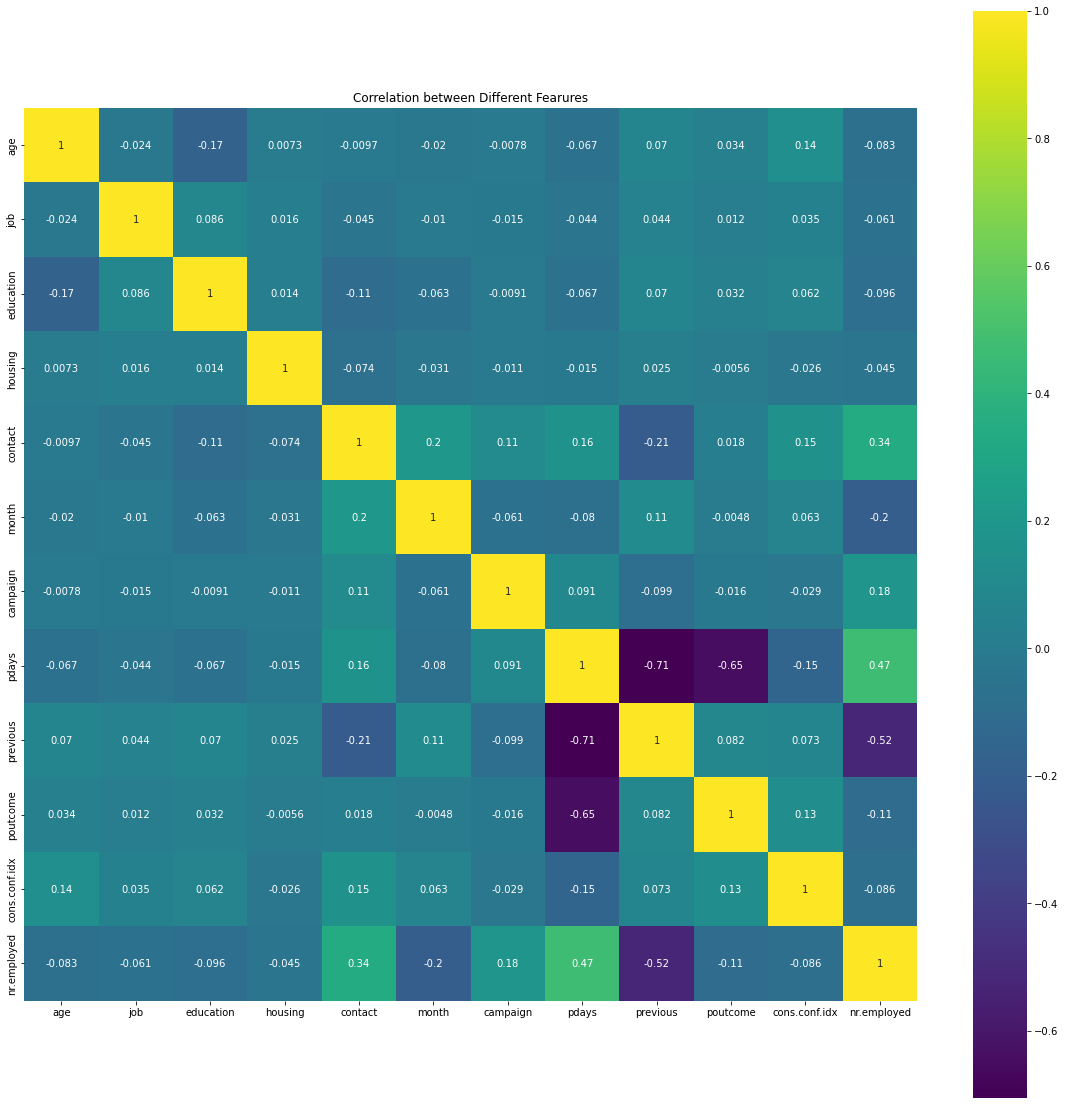

In [107]:
#Visual Correlation
correlation = X_train_new.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between Different Fearures')

In [108]:
#Final Balanced Training Label (Target)
y_train_balanced = df_upsampled["y"] 
y_train_balanced

0        0
1        0
2        0
3        0
4        0
        ..
22404    1
24750    1
2793     1
21728    1
37132    1
Name: y, Length: 73096, dtype: int64

In [109]:
#Confirmation of balanced training label to avoid bias in the machine learning training phase
y_train_balanced.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [ ]:
c

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>BUILDING MACHINE LEARNING MODEL</h2>
</div>

# RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier
# 2. Create an instance of the estimator
rf = RandomForestClassifier(max_depth=3) 
# 3. Use the training data to train the estimator
rf.fit(X_train_new, y_train_balanced)

RandomForestClassifier(max_depth=3)

In [111]:
y_train_pred = rf.predict(X_train_new)
y_pred = rf.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred, y_train_balanced))
print('Test r2 score: ', r2_score(y_test, y_pred))

train_mse = mean_squared_error(y_train_pred, y_train_balanced)
test_mse = mean_squared_error(y_pred, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('Train RMSE: %.2f' % train_rmse)
print('Test RMSE: %.2f' % test_rmse)

Train r2 score:  -0.1404491650634332
Test r2 score:  -0.6084715553140458
Train RMSE: 0.51
Test RMSE: 0.40


# XGBOOST

In [112]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_new, y_train_balanced, verbose=False)

[18:32:56] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_train_pred_xg = xgb_model.predict(X_train_new)
y_pred_xg = xgb_model.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred_xg, y_train_balanced))
print('Test r2 score: ', r2_score(y_test, y_pred_xg))

train_mse_xg = mean_squared_error(y_train_pred_xg, y_train_balanced)
test_mse_xg = mean_squared_error(y_pred_xg, y_test)

train_rmse_xg = np.sqrt(train_mse_xg)
test_rmse_xg = np.sqrt(test_mse_xg)

print('Train RMSE: %.2f' % train_rmse_xg)
print('Test RMSE: %.2f' % test_rmse_xg)

Train r2 score:  0.14820520340355392
Test r2 score:  -0.4067064329715915
Train RMSE: 0.45
Test RMSE: 0.38


# XGBOOST HYPERPARAMTER TUNING 

In [114]:
xgb_model2 = XGBClassifier(n_estimators=1000)
xgb_model2.fit(X_train_new, y_train_balanced, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=True)

y_train_pred6 = xgb_model2.predict(X_train_new)
y_pred6 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred6, y_train_balanced))
print('Test r2 score: ', r2_score(y_test, y_pred6))

train_mse6 = mean_squared_error(y_train_pred6, y_train_balanced)
test_mse6 = mean_squared_error(y_pred6, y_test)

train_rmse6 = np.sqrt(train_mse6)
test_rmse6 = np.sqrt(test_mse6)

print('Train RMSE: %.4f' % train_rmse6)
print('Test RMSE: %.4f' % test_rmse6)

[18:32:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.61529
[1]	validation_0-logloss:0.57015
[2]	validation_0-logloss:0.54237
[3]	validation_0-logloss:0.52564
[4]	validation_0-logloss:0.51519
[5]	validation_0-logloss:0.50768
[6]	validation_0-logloss:0.50242
[7]	validation_0-logloss:0.49877
[8]	validation_0-logloss:0.49542
[9]	validation_0-logloss:0.49364
[10]	validation_0-logloss:0.49185
[11]	validation_0-logloss:0.49002
[12]	validation_0-logloss:0.48877
[13]	validation_0-logloss:0.48617
[14]	validation_0-logloss:0.48551
[15]	validation_0-logloss:0.48464
[16]	validation_0-logloss:0.48439
[17]	validation_0-logloss:0.48355
[18]	validation_0-logloss:0.48254
[19]	validation_0-logloss:0.48103
[20]	validation_0-logloss:0.47952
[21]	va

[229]	validation_0-logloss:0.35420
[230]	validation_0-logloss:0.35385
[231]	validation_0-logloss:0.35381
[232]	validation_0-logloss:0.35379
[233]	validation_0-logloss:0.35361
[234]	validation_0-logloss:0.35338
[235]	validation_0-logloss:0.35312
[236]	validation_0-logloss:0.35306
[237]	validation_0-logloss:0.35269
[238]	validation_0-logloss:0.35221
[239]	validation_0-logloss:0.35190
[240]	validation_0-logloss:0.35147
[241]	validation_0-logloss:0.35090
[242]	validation_0-logloss:0.35067
[243]	validation_0-logloss:0.35047
[244]	validation_0-logloss:0.35037
[245]	validation_0-logloss:0.35026
[246]	validation_0-logloss:0.35019
[247]	validation_0-logloss:0.34997
[248]	validation_0-logloss:0.34981
[249]	validation_0-logloss:0.34971
[250]	validation_0-logloss:0.34901
[251]	validation_0-logloss:0.34854
[252]	validation_0-logloss:0.34793
[253]	validation_0-logloss:0.34729
[254]	validation_0-logloss:0.34673
[255]	validation_0-logloss:0.34627
[256]	validation_0-logloss:0.34582
[257]	validation_0-l

[464]	validation_0-logloss:0.28905
[465]	validation_0-logloss:0.28900
[466]	validation_0-logloss:0.28880
[467]	validation_0-logloss:0.28860
[468]	validation_0-logloss:0.28856
[469]	validation_0-logloss:0.28846
[470]	validation_0-logloss:0.28831
[471]	validation_0-logloss:0.28826
[472]	validation_0-logloss:0.28815
[473]	validation_0-logloss:0.28807
[474]	validation_0-logloss:0.28769
[475]	validation_0-logloss:0.28738
[476]	validation_0-logloss:0.28719
[477]	validation_0-logloss:0.28675
[478]	validation_0-logloss:0.28639
[479]	validation_0-logloss:0.28596
[480]	validation_0-logloss:0.28568
[481]	validation_0-logloss:0.28535
[482]	validation_0-logloss:0.28493
[483]	validation_0-logloss:0.28458
[484]	validation_0-logloss:0.28419
[485]	validation_0-logloss:0.28388
[486]	validation_0-logloss:0.28376
[487]	validation_0-logloss:0.28354
[488]	validation_0-logloss:0.28338
[489]	validation_0-logloss:0.28318
[490]	validation_0-logloss:0.28306
[491]	validation_0-logloss:0.28292
[492]	validation_0-l

[699]	validation_0-logloss:0.24938
[700]	validation_0-logloss:0.24935
[701]	validation_0-logloss:0.24930
[702]	validation_0-logloss:0.24908
[703]	validation_0-logloss:0.24892
[704]	validation_0-logloss:0.24881
[705]	validation_0-logloss:0.24868
[706]	validation_0-logloss:0.24846
[707]	validation_0-logloss:0.24824
[708]	validation_0-logloss:0.24791
[709]	validation_0-logloss:0.24779
[710]	validation_0-logloss:0.24771
[711]	validation_0-logloss:0.24748
[712]	validation_0-logloss:0.24744
[713]	validation_0-logloss:0.24728
[714]	validation_0-logloss:0.24710
[715]	validation_0-logloss:0.24684
[716]	validation_0-logloss:0.24667
[717]	validation_0-logloss:0.24657
[718]	validation_0-logloss:0.24631
[719]	validation_0-logloss:0.24600
[720]	validation_0-logloss:0.24574
[721]	validation_0-logloss:0.24566
[722]	validation_0-logloss:0.24526
[723]	validation_0-logloss:0.24499
[724]	validation_0-logloss:0.24489
[725]	validation_0-logloss:0.24479
[726]	validation_0-logloss:0.24477
[727]	validation_0-l

[934]	validation_0-logloss:0.22221
[935]	validation_0-logloss:0.22214
[936]	validation_0-logloss:0.22208
[937]	validation_0-logloss:0.22187
[938]	validation_0-logloss:0.22174
[939]	validation_0-logloss:0.22159
[940]	validation_0-logloss:0.22145
[941]	validation_0-logloss:0.22131
[942]	validation_0-logloss:0.22116
[943]	validation_0-logloss:0.22105
[944]	validation_0-logloss:0.22096
[945]	validation_0-logloss:0.22090
[946]	validation_0-logloss:0.22087
[947]	validation_0-logloss:0.22072
[948]	validation_0-logloss:0.22071
[949]	validation_0-logloss:0.22068
[950]	validation_0-logloss:0.22057
[951]	validation_0-logloss:0.22054
[952]	validation_0-logloss:0.22051
[953]	validation_0-logloss:0.22046
[954]	validation_0-logloss:0.22045
[955]	validation_0-logloss:0.22031
[956]	validation_0-logloss:0.22014
[957]	validation_0-logloss:0.22002
[958]	validation_0-logloss:0.21994
[959]	validation_0-logloss:0.21994
[960]	validation_0-logloss:0.21986
[961]	validation_0-logloss:0.21977
[962]	validation_0-l

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 
style='margin:10px 5px'>Explainable and interpretable machine learning techniques- Shapley and Lime</h2>
</div>

### SHAP

In [115]:
import shap

In [116]:
explainer =shap.Explainer(xgb_model2)
shap_values = explainer(X_test)

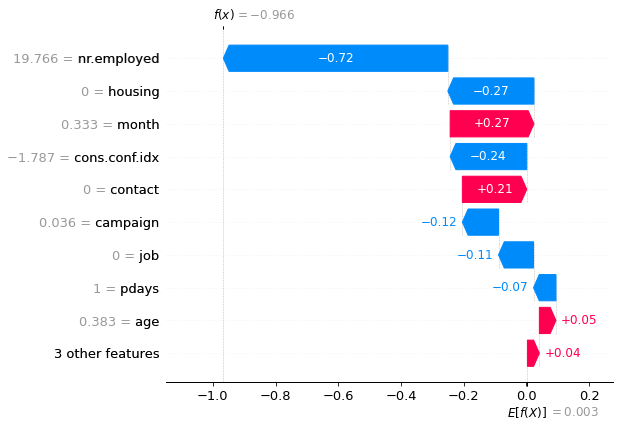

In [133]:
shap.plots.waterfall(shap_values[0])

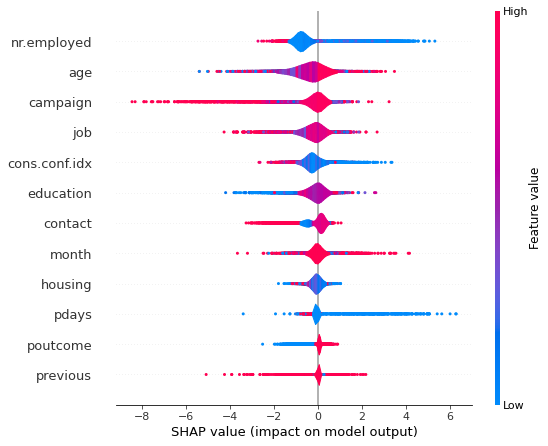

In [117]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

**SHAP- Global variable :**
**it specifically identify the important features that contribute to/impact a particular outcome - overall based**


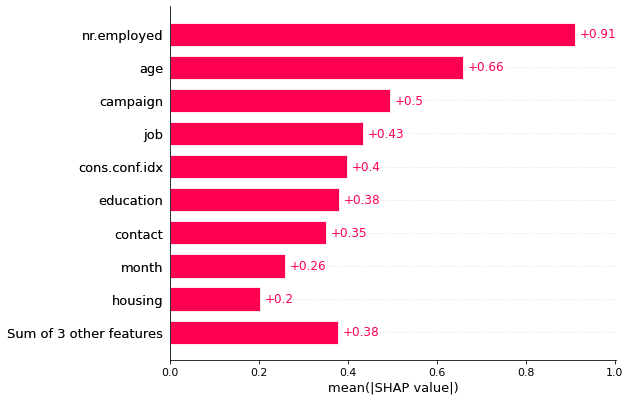

In [118]:
shap.plots.bar(shap_values)

In [119]:
shap_values.shape

(12357, 12)

In [120]:
X_test.shape

(12357, 12)

In [121]:
print(xgb_model2.predict(X_test.iloc[:10]))

[0 0 0 1 0 0 0 0 1 0]


In [122]:
shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[0], X_test[0],feature_names=X_train_new.columns )

shap.force_plot(shap_values[8])

**The output value 3.65 has been marked in bold and it is the prediction probability for the instance being 
predicted as client subscription to term deposit. That is, the Xgboost classifier in the forest voted for the subscription to term deposit class, so the instance was predicted as subscription to term deposit**

**The base value is the mean of the model output over the background dataset. The background dataset is 
formed by one instance where each feature takes its median in the train dataset. Taking the prediction for this 
instance we have 0.003014, which is the probability that the instance is predicted that client will subscribe to 
the term deposit, which is exactly the base value** 

*To interpret an individual prediction, we select a random instance from the test set (instance_idx = 42) and use SHAP’s force_plot function. This plot shows how each feature contributes to the model’s prediction for this specific instance, with positive values pushing the prediction towards the positive class and negative values pushing it towards the negative class*.

*SHAP provides a powerful way to interpret XGBoost models by quantifying the overall impact of each feature on the model’s predictions. The summary_plot gives a global view of feature importances, while the force_plot allows the understand of the factors driving a specific prediction. By combining these insights, you can gain a deeper understanding of xgboost model’s behavior and make more informed decisions based on its predictions*

In [123]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
dt.fit(X_train_new, y_train_balanced)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

### LIME

In [124]:
import lime
import lime.lime_tabular

In [125]:
np.array(X_train_new)

array([[ 0.45679012,  0.4       ,  1.        , ...,  0.5       ,
        -1.93305439, 19.27826087],
       [ 0.66666667,  0.4       ,  1.        , ...,  0.5       ,
        -1.12552301, 18.96975425],
       [ 0.60493827,  0.1       ,  0.33333333, ...,  0.5       ,
        -1.52301255, 19.62570888],
       ...,
       [ 0.74074074,  0.4       ,  1.        , ...,  0.5       ,
        -1.74895397, 19.76597353],
       [ 0.40740741,  0.2       ,  1.        , ...,  0.5       ,
        -1.78661088, 19.76597353],
       [ 0.43209877,  1.        ,  1.        , ...,  1.        ,
        -1.12552301, 18.96975425]])

In [126]:
features_names= X_train_new.columns

In [127]:
features_names

Index(['age', 'job', 'education', 'housing', 'contact', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [128]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train_new),
            feature_names= X_train_new.columns,
            verbose=True, mode= 'classification')

In [129]:
exp = explainer.explain_instance(X_test.iloc[3], xgb_model2.predict_proba, num_features= 5)

exp.show_in_notebook(show_table = True)

Intercept 0.10461288286829942
Prediction_local [0.51745467]
Right: 0.98579425


**LIME - Local Interpretation variable**
It implies the features that contributes to a decision made - instance specific

**LIME provides a helpful way to understand the factors driving an individual prediction made by an XGBoost hyper parameter tuning model. By examining the features and their contributions, gained insights into what the model considers important for a particular instance. This shows Prediction of 0.98579425 that a specific individaual will subcribe to term deposit, considering the following 5 features nr.employed, contact, campaign, education and previous. while previous do not contribute to this prediction.** 

In [130]:
exp.as_list()[0]

('nr.employed <= 19.19', 0.26859948885709267)

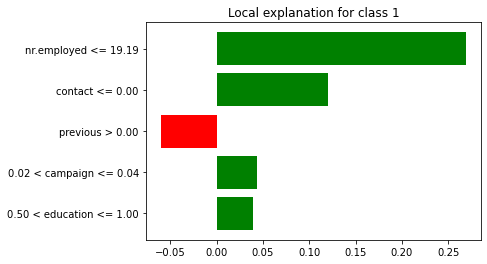

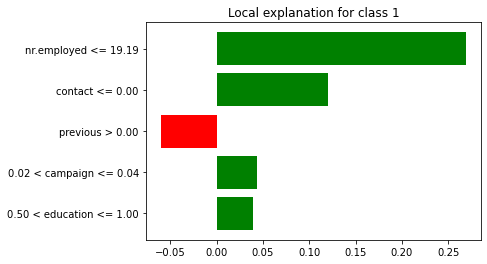

In [131]:
exp.as_pyplot_figure()

**Note that LIME explanations are local, meaning they are specific to the chosen instance and may not represent the model’s overall behavior. It’s essential to consider multiple instances and the global feature importances to get a comprehensive understanding of the model’s decision-making process.

